# **basic stacked area**

#### Input ที่ต้องการ มี 3 Column ใช้ภายใน **geom_area**

> #### **X** = ตัวแปร numeric สำหรับแกน x ส่วนใหญ่จะเป็นเวลา

> #### **y** = ตัวแปร numeric สำหรับแกน y คือสิ่งที่เราต้องการหา

> #### **group**


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




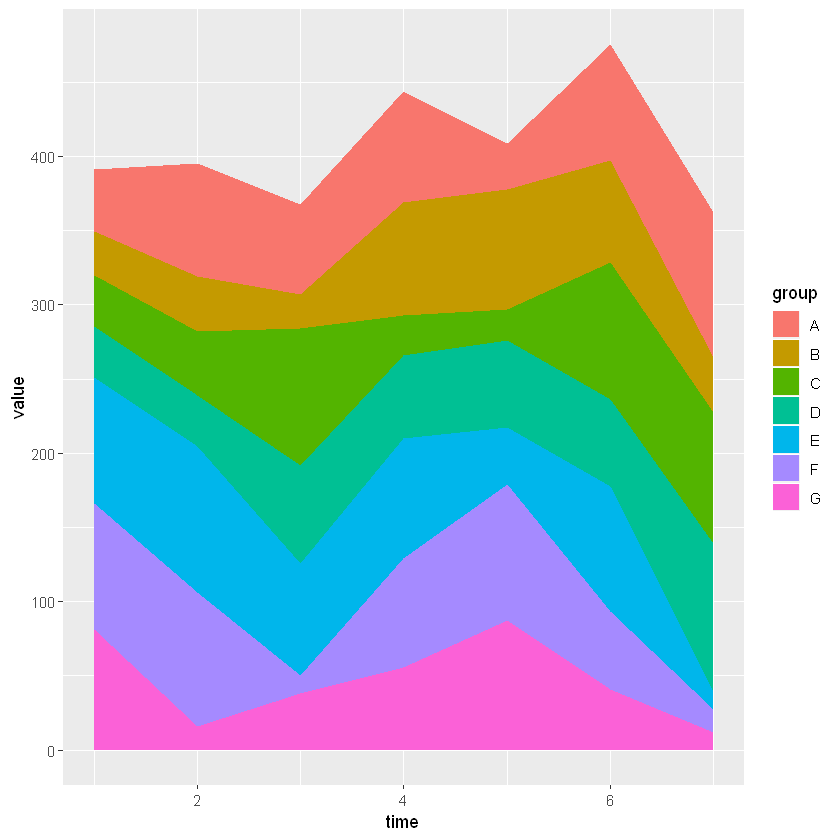

In [3]:
# Packages
library(ggplot2)
library(dplyr)
 
# create data
time <- as.numeric(rep(seq(1,7),each=7))  # x Axis
value <- runif(49, 10, 100)               # y Axis
group <- rep(LETTERS[1:7],times=7)        # group, one shape per group
data <- data.frame(time, value, group)

# stacked area chart
ggplot(data, aes(x=time, y=value, fill=group)) + 
    geom_area()

### **จัดการกับ Stack ด้วย ggplot2**

> #### กำหนดคำสั่งเฉพาะด้วย **factor()**

> #### เรียงลำดับตัวอักษรด้วย **sort()**

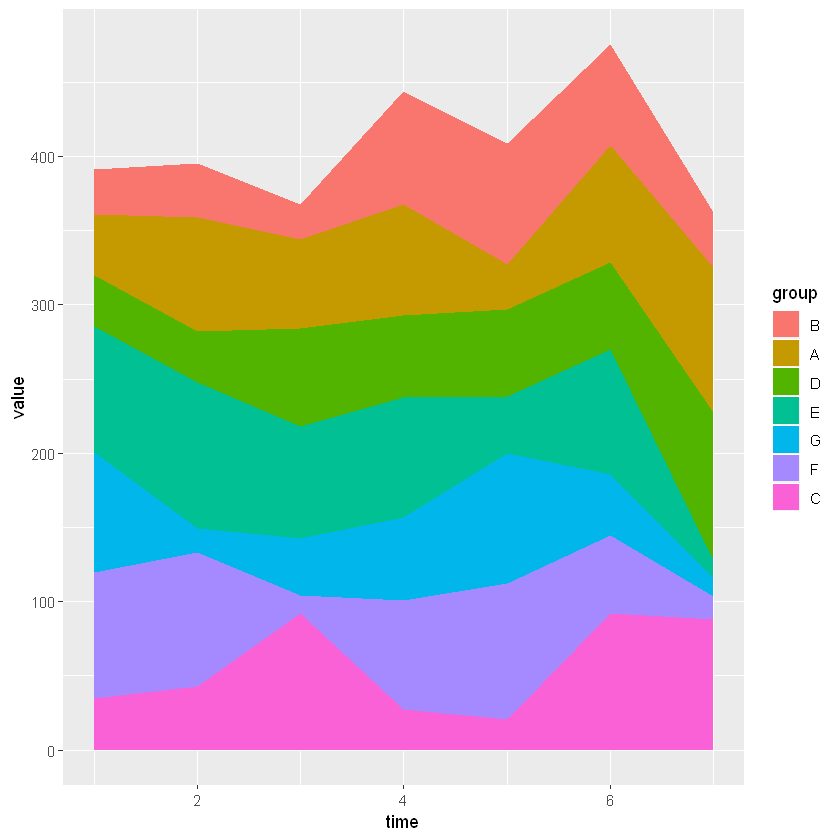

In [5]:
# Give a specific order:
data$group <- factor(data$group , levels=c("B", "A", "D", "E", "G", "F", "C") )

# Plot again
ggplot(data, aes(x=time, y=value, fill=group)) + 
    geom_area()

# Note: you can also sort levels alphabetically:
myLevels <- levels(data$group)
data$group <- factor(data$group , levels=sort(myLevels) )

# Note: sort followinig values at time = 5
myLevels <- data %>%
  filter(time==6) %>%
  arrange(value)
data$group <- factor(data$group , levels=myLevels$group )

### **การจัด Stack ตามสัดส่วน**

> #### โดยต้องคำนวณออกมาเป็น % ก่อน โดยใช้ dplyr

Warning message in FUN(newX[, i], ...):
"NAs introduced by coercion"
Warning message:
"Unknown or uninitialised column: 'value'."
Warning message in FUN(newX[, i], ...):
"NAs introduced by coercion"
Warning message:
"Unknown or uninitialised column: 'value'."
Warning message in FUN(newX[, i], ...):
"NAs introduced by coercion"
Warning message:
"Unknown or uninitialised column: 'value'."
Warning message in FUN(newX[, i], ...):
"NAs introduced by coercion"
Warning message:
"Unknown or uninitialised column: 'value'."
Warning message in FUN(newX[, i], ...):
"NAs introduced by coercion"
Warning message:
"Unknown or uninitialised column: 'value'."
Warning message in FUN(newX[, i], ...):
"NAs introduced by coercion"
Warning message:
"Unknown or uninitialised column: 'value'."
Warning message in FUN(newX[, i], ...):
"NAs introduced by coercion"
Warning message:
"Unknown or uninitialised column: 'value'."
Warning message in FUN(newX[, i], ...):
"NAs introduced by coercion"
Warning message:
"Unk

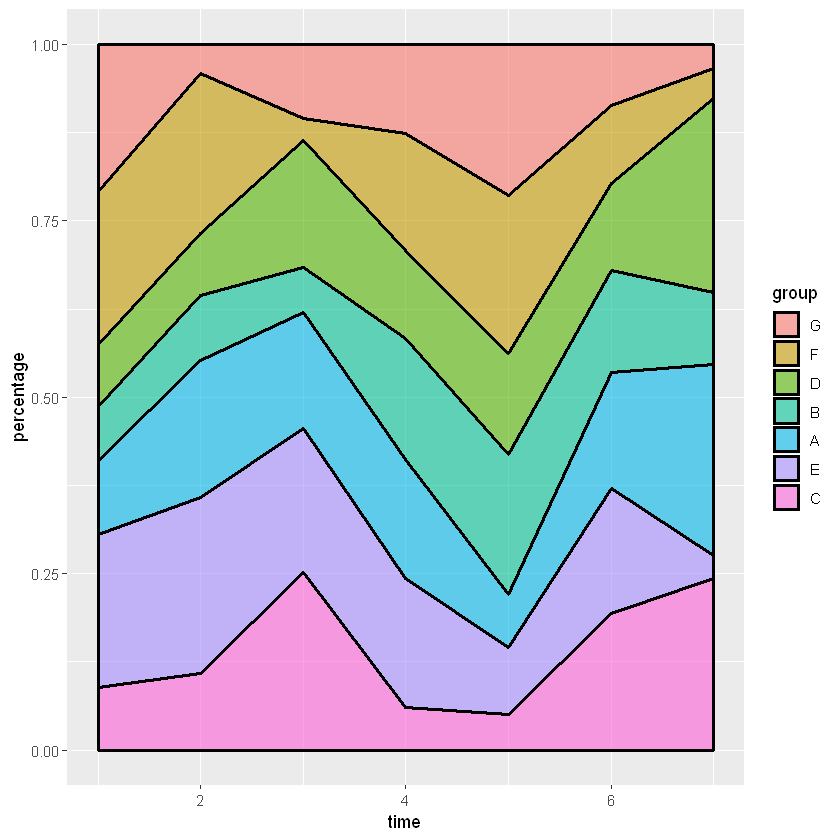

In [6]:
# Compute percentages with dplyr
library(dplyr)
data <- data  %>%
  group_by(time, group) %>%
  summarise(n = sum(value)) %>%
  mutate(percentage = n / sum(n))

# Plot
ggplot(data, aes(x=time, y=percentage, fill=group)) + 
    geom_area(alpha=0.6 , size=1, colour="black")

# Note: compute percentages without dplyr:
my_fun <- function(vec){ 
  as.numeric(vec[2]) / sum(data$value[data$time==vec[1]]) *100 
}
data$percentage <- apply(data , 1 , my_fun)

### **การใส่สีและรูปแบบของกราฟ**

> #### ใส่สีด้วย **Viridis**

> #### เปลี่ยนธีมด้วย **theme_ipsum**

> #### เพิ่มชื่อเรื่องด้วย **ggtitle()**

Loading required package: viridisLite

NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see http://bit.ly/arialnarrow

Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"f

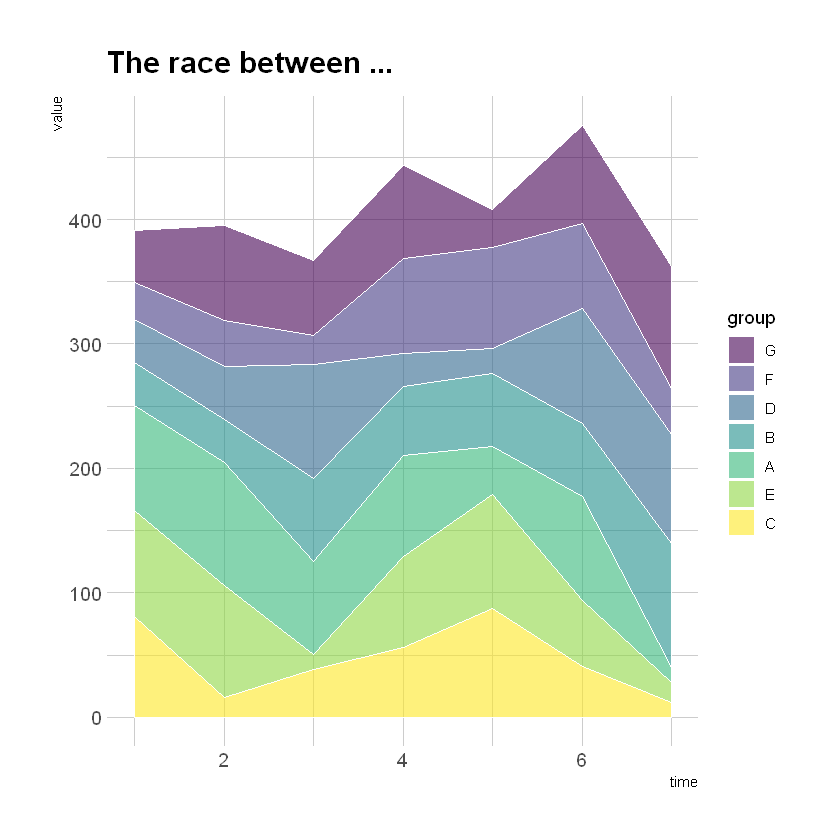

In [7]:
# Library
library(viridis)
library(hrbrthemes)

# Plot
ggplot(data, aes(x=time, y=value, fill=group)) + 
    geom_area(alpha=0.6 , size=.5, colour="white") +
    scale_fill_viridis(discrete = T) +
    theme_ipsum() + 
    ggtitle("The race between ...")